In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
df=pd.read_csv("C:\\Users\\91988\\Downloads\\used_automobile.csv",header= None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [2]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
df.dtypes               #to check the data type of columns in a dataframe

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
df["price"].dtypes        #to check the data type of particular column, in this "price"

dtype('O')

In [5]:
df["highway-mpg"].dtypes    #to check the data type of "highway-mpg" column

dtype('int64')

In [6]:
df.describe()           #to get the statistical summary of the dataframe (this only shows the summary of those columns which are having numerical data)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
df.describe(include="all")     #to check the statistical summary of all columns including those with categorical data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
df.columns            #to get the list of all column labels

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [10]:
df[["length","compression-ratio"]].describe()     #to check the statistical summary of particular column(s)

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


In [11]:
import numpy as np
df.replace("?", np.nan, inplace=True)    #replace "?" to NaN
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
missing_data=df.isnull()  #checking whether the data entry is missing or not, "true"=missing value & "false"= not missing value
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in missing_data.columns.values.tolist():        #for counting missing values in each column using for loop
    print(column)                                          #this method usually counts the true values in the above case
    print(missing_data[column].value_counts())             #where true stands for missing data
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [14]:
avg_norm_loss= df["normalized-losses"].astype("float").mean(axis=0)     #to calculate the average of normalized-losses column
print("avg of normalized-losses:", avg_norm_loss)

avg of normalized-losses: 122.0


In [15]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace= True) #to replace missing values in normalized losses by mean of normalized-losses
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
avg_stroke=df["stroke"].astype("float").mean(axis=0)     #to calculate the mean of stroke column
print("avg of stroke:",avg_stroke)

avg of stroke: 3.2554228855721337


In [17]:
df["stroke"].replace(np.nan, avg_stroke, inplace=True)   #to replace missing data in stroke column by the mean of stroke column

In [18]:
avg_bore=df["bore"].astype("float").mean(axis=0)         #to calculate the mean of bore column
print("average of bore:",avg_bore)

average of bore: 3.3297512437810957


In [19]:
df["bore"].replace(np.nan, avg_bore, inplace=True)       #to replace missing data in bore column by the mean of bore column

In [20]:
avg_horsepower=df["horsepower"].astype("float").mean(axis=0)  #to calculate the mean of the horsepower column
print("average horsepower:",avg_horsepower)

average horsepower: 104.25615763546799


In [21]:
df["horsepower"].replace(np.nan,avg_horsepower, inplace=True)  #to replace missing data in horsepower column by the mean of horsepower column

In [22]:
avg_peakrpm=df["peak-rpm"].astype("float").mean(axis=0)  #to calculate the mean of peak-rpm column
print("average peak-rpm:",avg_peakrpm)

average peak-rpm: 5125.369458128079


In [23]:
df["peak-rpm"].replace(np.nan,avg_peakrpm, inplace=True)   #to replace missing data in peak-rpm by the mean of peak-rpm column

In [24]:
df["num-of-doors"].value_counts()          #to see which values are present in a particular column & their counts, here "num-of-doors"

four    114
two      89
Name: num-of-doors, dtype: int64

In [25]:
df["num-of-doors"].value_counts().idxmax()              #to calculate the most common type automatically

'four'

In [26]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)  #to replace the missing data in "num-of-doors" column with the top (most common) value
                                                          #i.e. replace missing data with "four"                                                        

In [27]:
df.dropna(subset=["price"], axis=0,  inplace=True)      #dropping all rows that contains missing data in "price" column

In [28]:
df.reset_index(drop=True, inplace=True)               #to reset index of the dataframe after dropping the rows

In [29]:
df.dtypes                                            #to check data type of columns in a dataframe

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [30]:
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float")      #to convert type "object" to type "float"

In [31]:
df[["normalized-losses"]]=df[["normalized-losses"]].astype("int")   #to convert "object" to "int" type

In [32]:
df[["price"]]=df[["price"]].astype("float")                        #to convert "object" type to "float" type

In [33]:
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")                   #to convert "object" to "float" type

In [34]:
df.dtypes                                                    #check whether changes have been made to original dataframe or not

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [35]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [36]:
df["length"].head()

0    168.8
1    168.8
2    171.2
3    176.6
4    176.6
Name: length, dtype: float64

In [37]:
df["width"].head()

0    64.1
1    64.1
2    65.5
3    66.2
4    66.4
Name: width, dtype: float64

In [38]:
df["height"].head()

0    48.8
1    48.8
2    52.4
3    54.3
4    54.3
Name: height, dtype: float64

#### Normalizing the "length" column using "simple scaling method" 

In [39]:
df["length"]=df["length"]/df["length"].max()    #normalizing "length" column by simple feature scaling method ((original value)/(maximum value))
df["length"].head()

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

#### Normalizing the "width" column by using "simple scaling method"

In [40]:
df["width"]=df["width"]/df["width"].max()      #normalizing "width" by simple feature scaling ((original value)/(maximum value))
df["width"].head()

0    0.890278
1    0.890278
2    0.909722
3    0.919444
4    0.922222
Name: width, dtype: float64

#### Normalizing the "heigth"column by "simple scaling method"

In [41]:
df["height"]=df["height"]/df["height"].max()  #normalizing "height" by simple feature scaling ((original value)/(maximum value))
df["height"].head()

0    0.816054
1    0.816054
2    0.876254
3    0.908027
4    0.908027
Name: height, dtype: float64

#### dataframe to show scaled columns

In [42]:
df[["length","width","height"]].head()  #showing scaled columns

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Example of Binning Data in pandas

In [43]:
df["horsepower"]=df["horsepower"].astype("int", copy= True)   #to convert data into correct format

In [44]:
bins= np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4) #Using numpy's linspace function to create 3 bins of equal size
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [45]:
group_names=["Low","Medium","High"]   #to set group names for each bin
df["horsepower-binned"]=pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)  #applying "cut" function to determine what each value of "df['horsepower']" belongs to
df[["horsepower", "horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [46]:
df["horsepower-binned"].value_counts()  #using value_counts function to see no.of vehicles in each bin

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

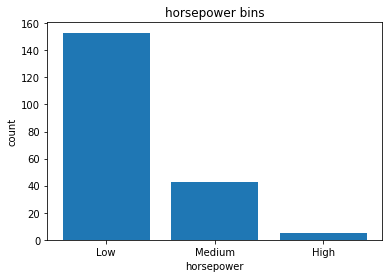

In [47]:
%matplotlib inline                                                
import matplotlib as plt 
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

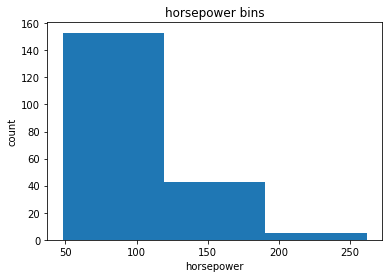

In [48]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#drawing histogram of attribute "horsepower" with 3 bins
plt.pyplot.hist(df["horsepower"], bins=3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Turning categorical variables into quantitative variables 

In [49]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])   #Using pandas "get_dummies" method to get indicator(dummy) variables
                                                     #and assigning it to dataframe named "dummy_variable_1"
dummy_variable_1.tail()                              #displaying last 5 rows of the dummy_variable_1 dataframe using "tail" method

,diesel,gas
196,0,1
197,0,1
198,0,1
199,1,0
200,0,1


In [50]:
dummy_variable_1.rename(columns={"diesel":"fuel-type-diesel","gas":"fuel-type-gas"}, inplace= True) #changing column names in dummy_variable_1 using pandas "rename" method
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [51]:
df=pd.concat([df, dummy_variable_1], axis=1)    #using pandas "concat" method to merge "dummy_variable_1" & "df"

In [52]:
df.drop("fuel-type", axis= 1,  inplace= True)  # using pandas "drop" method to drop original "fuel-type" column from df
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [53]:
dummy_variable_2=pd.get_dummies(df["aspiration"])  # using pandas "get_dummies" method to get dummy variables for the column "aspiration"
dummy_variable_2.tail()

,std,turbo
196,1,0
197,0,1
198,1,0
199,0,1
200,0,1


In [54]:
dummy_variable_2.rename(columns= {"std": "aspiration-std", "turbo": "aspiration-turbo"}, inplace= True) #using pandas "rename" method to change column names of "dummy variable_2" dataframe
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [55]:
df= pd.concat([df, dummy_variable_2], axis=1)    #using pandas "concat" method to merge "df" & "dummy_variable_2"

In [56]:
df.drop("aspiration", axis=1, inplace= True)    # using pandas "drop" method to drop "aspiration" column from df
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


# Exploratory Data Analysis

### Analyzing Individual feature Patterns using visualization

In [57]:
#Importing visualization libraries - "matplotlib" & "seaborn"
import matplotlib.pyplot as plt                           #importing "matplotlib"
import seaborn as sns                                     #importing "seaborn"
%matplotlib inline

In [58]:
df.dtypes    #diplaying data type of each column to choose right visualization method

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

In [59]:
df[["bore","stroke","compression-ratio","horsepower"]].corr()    #using pandas "corr()" method to find correlation b/w "bore", "stroke","compression-ratio" & "horsepower"

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


#### Visualization of Continuous Numerical variables - "int" & "float" and different type of linear relationship b/w them

(0.0, 52759.79478052203)

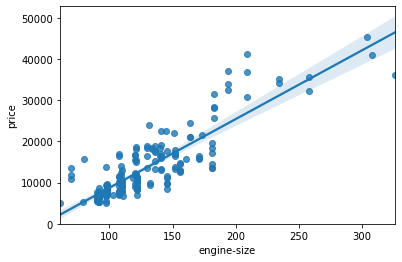

In [60]:
sns.regplot(x="engine-size", y= "price", data= df)  #using seaborn's "regplot" method to plot "scatterplot" plus "fitted regression line" for the data, "x" is the independent variable and "y" is the dependent variable or the target variable
plt.ylim(0,)       #using matplotlibs "ylim" function to set the y-limits(or limit of "y" in range format) of the current axes 

from the above we can say that there is a positive linear relationship b/w "engine-size" & "price" because as the 
"engine-size" goes up;  the "price" goes up, this indicates a positive direct correlation between these two variables. Also, 
"engine-size" seems like a pretty"good predictor" of "price" since the "regression line" is "almost a perfect diagonal line"

In [61]:
df[["engine-size","price"]].corr()  #using pandas "corr()" method to examine the correlation between "engine-size" & "price"

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


the correlation b/w "engine-size" & "price" is approximately 0.87 which indicates "strong" "positive" linear relationship

In [62]:
df[["highway-mpg","price"]].corr()   #using pandas "corr()" method to find correlation between "highway-mpg" & "price"

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


the correlation b/w "highway-mpg" & "price" is approximately -0.704 which indicates "strong" "negative" linear relationship 

(0.0, 48170.610732431756)

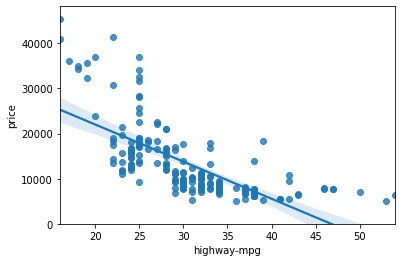

In [63]:
sns.regplot(x="highway-mpg", y= "price", data=df)  #using seaborns "regplot" function to plot "scatterplot" plus "fitted regression line", where "highway-mpg" is the independent variable and "price" is the dependent variable
plt.ylim(0,)    #using matplotlib's "ylim" method to set limit of dependent variable i.e. "price" in the form of range which starts from zero

from the above we can say that there is a __negative linear relationship__ between "highway-mpg" & "price" because as the "highway-mpg" goes up; the "price" goes down this indicates an __inverse/negative relationship b/w two variables__. Also, "highway-mpg" could __"potentially be a predictor"__ of "price"

(0.0, 47414.1)

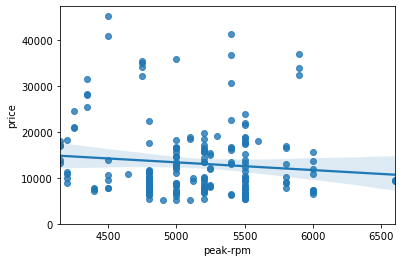

In [64]:
#check if "peak-rpm" is a predictor variable of "price"
sns.regplot(x="peak-rpm", y="price", data=df)   #using seaborns "regplot" function to plot "scatterplot" plus "fitted regression line" to examine the relation b/w "peak-rpm" & "price"
plt.ylim(0,)                                    #using matplotlib's "ylim" method to set the y-limits

from the above "scatterplot" we can say the __"peak-rpm"__ is __"not a good predictor variable"__ of "price" at all since regression is close to horizontal. Also, the data points are very scattered and far from the fitted regression line, showing lots of variability. Therefore it is "not a reliable variable" 

In [65]:
df[["peak-rpm", "price"]].corr()        #using pandas "corr()" method to examine the correlation b/w "peak-rpm" & "price"

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


The correlation between "peak-rpm" & "price" is approximately __-0.101__, which indicates __"weak" "negative" linear relationship"__. Thus, "peak-rpm" is __not good predictor__ of "price"

In [66]:
df[["stroke","price"]].corr()         #using pandas "corr()" method to examine correlation b/w "stroke" & "price"

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


The correlation b/w "stroke" & "price" is approximately __0.082__, which indicates __"weak" positive linear relationship__ b/w the two variables and thus __"stroke"__ is __"not a good predictor"__  of the __"price"__

(0.0, 47414.1)

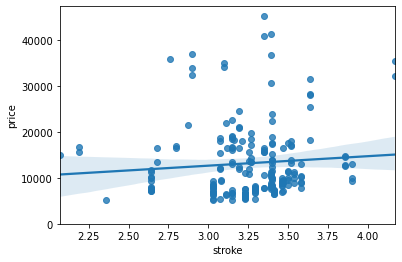

In [67]:
sns.regplot(x="stroke", y="price", data=df)    #using seaborns "regplot" method to plot "scatterplot" & "fitted regression line" to examine the relationship b/w "stroke" (independent variable) & "price" (dependent variable or target value)
plt.ylim(0,)                                #using matplotlib's "ylim" to set y-limits

From the above scatterplot we can see the data points are far from fitted regression line and the shape of fitted regression line is close to horizontal shape which indicates there is __"no" or "weak" relationship__ b/w __"stroke" & "price"__. Thus "stroke" is __"not a good predictor"__ variable of "price". As such, regression will not work well

#### Visualization of categorical variables - "object" or "int"  & relation between them

<AxesSubplot:xlabel='body-style', ylabel='price'>

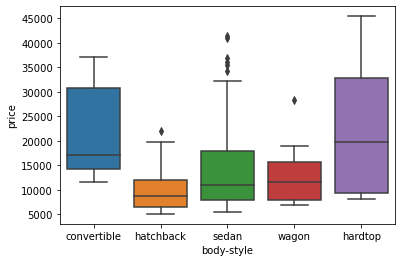

In [68]:
sns.boxplot(x="body-style", y= "price", data=df)  #using seaborns "boxplot" method to visualize the relation between "body-style"(independent variable) which is categorical and "price" which has data type "int"

In the above figure, the width of the boxplot is propotional to the sample size. We can see that the __distributions__ of __price__ between the __different body-style__ categories have a significant __"overlap"__, and so "body-style" would __"not be a good predictor"__ of "price"

<AxesSubplot:xlabel='engine-location', ylabel='price'>

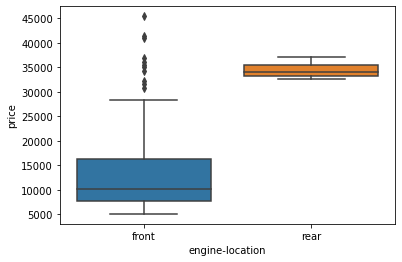

In [69]:
sns.boxplot(x="engine-location", y="price", data=df) #using seaborns "boxplot" method to visualize the relationship b/w "engine-location" & "price"

In the above side-by-side boxplot, we see that the __distribution__ of "price" between the two engine-locations categories, "front" and "rear", are __"distinct enough"__ to take __"engine-location"__ as a __"potential good predictor"__ of "price"

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

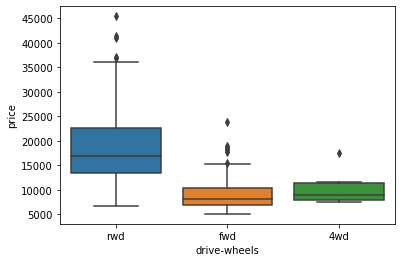

In [70]:
sns.boxplot(x="drive-wheels", y="price", data=df)   #using seaborn's "boxplot" method to visualize relation b/w "drive-wheels" & "price"

Here we see that the __distribution__ of "price" between the different "drive-wheels" categories;"rwd","fwd" & "4wd" __"differs"__; as such "drive-wheels" could __"potentially be a predictor"__ of "price"

### Descriptive Statistical analysis 

In [71]:
df.describe()         #using pandas describe method to get the statistical summary of the data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In the above dataset, categorical data is skipped by default

In [72]:
df.describe(include=["object"])           #using pandas "describe" method along with the parameter "include" and setting its value to "object" in order to get statistical summary of "categorical data" 

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


in the above dataset, "count" represents there are 201 values in a given column excluding NaN values, "unique" indicates the number of unique type of values, "top" shows the most often value in a column and "freq" represents the no. of the times the most often value repeated in a columnn or simply the count of most frequent value in a column and it displays statistical summary of categorical columns only

In [73]:
df.describe(include="all")   #using pandas "describe" method along with the parameter "include" & setting its value to "all" in order to get the statistical summary of both numerical type as well as categorical type of data

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,103.402985,5117.665368,25.179104,30.686567,13207.129353,NaN,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,37.365650,478.113805,6.423220,6.815150,7947.066342,NaN,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,95.000000,5125.369458,24.000000,30.000000,10295.000000,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,NaN,0.000000,1.000000,1.000000,0.000000


In [74]:
df["drive-wheels"].value_counts()   #using pandas "value_count" method for understanding how many units of each characteristic/variable we have

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

The output is in the form of series

In [75]:
df["drive-wheels"].value_counts().to_frame()   #using pandas "to_frame" along with "value_counts" method to convert the series to a dataframe

,drive-wheels
fwd,118
rwd,75
4wd,8


In [76]:
drive_wheels_counts=df["drive-wheels"].value_counts().to_frame()  #"drive_wheels_counts" is the name of the given dataframe

In [77]:
drive_wheels_counts.rename(columns={"drive-wheels": "value-counts"}, inplace= True)  #using pandas "rename" method to change the name of the column in the dataframe "drive_wheels_counts"
drive_wheels_counts

,value-counts
fwd,118
rwd,75
4wd,8


In [78]:
drive_wheels_counts.index.name="drive-wheels" #to rename the index to "drive-wheels"
drive_wheels_counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [79]:
#repeating the above steps for "engine-location" variable(column)
engine_location_counts=df["engine-location"].value_counts().to_frame()
engine_location_counts.rename(columns={"engine-location": "value-counts"}, inplace= True)
engine_location_counts.index.name="engine-location"
engine_location_counts

,value-counts
engine-location,
front,198
rear,3


from the above, we can say that "engine location" would "not be a good predictor variable" for the "price" because there are only "three cars" with a "rear engine" and "198" with an engine in the "front", this "result" is "skewed". Thus, "no conclusions" about the engine location can be drawn

### Grouping of data - "groupby"

In [80]:
df["drive-wheels"].unique()   #using pandas "unique" method to get the unique values of the column "drive-wheels"

array(['rwd', 'fwd', '4wd'], dtype=object)

In [81]:
#to know, on average, which type of drive wheel is most valuable,group "drive-wheels" and then "average" them
df_group_one=df[["drive-wheels","price"]]  #selecting the desired columns and assigning to the variable "df_group_one"
#grouping results
df_group_one=df_group_one.groupby(["drive-wheels"], as_index=False).mean()  #using pandas "groupby" method to make grouping according to the column "drive-wheels" and using "mean()" method to get the "average price" of the selected group
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From the above data, it seems 
"rwd"(rear-wheel drive) vehicles are, __on "average", the "most expensive"__    


while "4wd" (4-wheel drive)    


and "fwd" (front-wheel drive) are __"approximately the same" in "price"__

In [82]:
#grouping multiple variables
df_gptest=df[["drive-wheels","body-style","price"]]
grouped_test1=df_gptest.groupby(["drive-wheels","body-style"], as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [83]:
#to visualize the above grouped data in the form of "pivot table"
grouped_pivot=grouped_test1.pivot(index="drive-wheels", columns= "body-style")  #using pandas "pivot" method to create pivot table where "index" values of the pivot is set "drive-wheels" and "columns" of the pivot set to "body-style"
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [84]:
#to fill missing or NaN values in the above pivot table with zero
grouped_pivot=grouped_pivot.fillna(0)       #filling missing values with "zero"
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

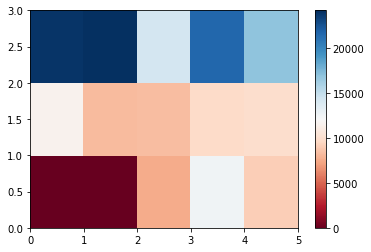

In [85]:
#to visualize grouped data with "heat map"
plt.pcolor(grouped_pivot, cmap= "RdBu")  #using matplotlib to generate the "heatmap" where colors set to "Rd-red" & "Bu-blue"
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the "price" is related to 'drive-wheel' and 'body-style'

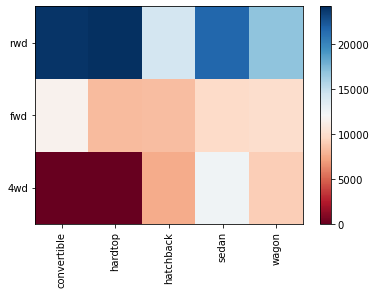

In [86]:
#to get the more information
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### To statistically know the significance level of correlation estimate

In [87]:
from scipy import stats    #importing "stats" module from scipy library

__pearson coef__ gives the __same result__ as pandas __"corr()"__ method which means the __value of correlation coefficient__

The __correlation coefficient__ should __accurately__ reflect the __strength of the relationship__ b/w two variables

whereas, __p_value__ is the __probability value__ which tells the __significance of correlation estimate__ or correlation between the two variables is __statistically significant__ which means __how confident__ we can be that the __correlation between the variables__ is __significant__


Therefore, __Correlation coefficient__ is a way to __test if two variables have any kind of relationship__, while __p-value__ tells __if the result of an experiment__ is __statistically significant__

In [88]:
#"wheel-base" vs "price"

pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])    #using "pearsonr" method of "stats" module from "scipy's library"

print("The pearson correlation coefficient is :", pearson_coef, "with a P-value of P=", p_value)

The pearson correlation coefficient is : 0.584641822265508 with a P-value of P= 8.076488270733218e-20


Thus, the value of __pearson correlation coefficient__ is __approximately 0.585__ while, __P-value__ is __approximately 8.076....e-20__ i.e., __0.00000000000000000008076488....__


__conclusion:__ 

We can conclude that the __linear relationship isn't extremely strong__ __(~0.585)__ and We can also see that the __P-value__ is __very small__, __much smaller than 0.001__.And so we can conclude that __we are certain about the moderately strong correlation__

In [89]:
#"horsepower" vs "price"
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print("The pearson correlation coefficient is:", pearson_coef, "with P-value of P=", p_value)

The pearson correlation coefficient is: 0.8096068016571054 with P-value of P= 6.273536270650504e-48


__Conclusion:__


Since the __p-value__ is __< 0.001__, the correlation b/w __"horsepower"__ & __"price"__ is __statistically significant__ and the __linear realtionship is also "strong"__ as the __correlation coefficient__ i.e.__0.809__ is near __1__  

In [90]:
#"length" vs "price"
pearson_coef, p_value = stats.pearsonr(df["length"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the P-value of P=", p_value)

the pearson correlation coefficient is : 0.6906283804483642 with the P-value of P= 8.016477466158759e-30


__Conclusion :__ 

Since the __p-value__ is  __<  0.001__, the correlation between __"length"__ and __"price"__ is __statistically significant__, and the __linear relationship__ is __moderately strong (0.691)__

In [91]:
#"width" vs "price"
pearson_coef, p_value = stats.pearsonr(df["width"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the P-value of P=", p_value)

the pearson correlation coefficient is : 0.7512653440522672 with the P-value of P= 9.20033551048217e-38


__Conclusion :__

Since the __p-value__ is __< 0.001__, the correlation between __"width"__ and __"price"__ is __statistically significant__, and the __linear relationship__ is __quite strong (0.751)__

In [92]:
#"curb-weight" vs "price"
pearson_coef,p_value = stats.pearsonr(df["curb-weight"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the p-value of P=", p_value)

the pearson correlation coefficient is : 0.8344145257702845 with the p-value of P= 2.189577238893816e-53


__Conclusion :__

Since the __p-value is  <  0.001__, the correlation between __curb-weight__ and __price__ is __statistically significant__ , and the __linear relationship__ is __quite strong (0.834)__

In [93]:
#"engine-size" vs "price"
pearson_coef, p_value = stats.pearsonr(df["engine-size"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the p-value of P=", p_value)

the pearson correlation coefficient is : 0.8723351674455186 with the p-value of P= 9.265491622197335e-64


__Conclusion :__

Since the __p-value is <0.001__, the correlation between __engine-size__ and __price__ is __statistically significant__ and the __linear realationship__ is __very strong (0.872)__

In [94]:
#"bore" vs "price"
pearson_coef, p_value = stats.pearsonr(df["bore"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the p-value of P=", p_value)

the pearson correlation coefficient is : 0.5431553832626602 with the p-value of P= 8.049189483935489e-17


__Conclusion :__

Since the __p-value is <0.001__, the correlation between __bore__ and __price__ is __statistically significant__ and the __linear realationship__ is __only moderate (0.543)__

In [95]:
#"city-mpg" vs "price"
pearson_coef, p_value = stats.pearsonr(df["city-mpg"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the p-value of P=", p_value)

the pearson correlation coefficient is : -0.6865710067844677 with the p-value of P= 2.321132065567674e-29


__Conclusion :__

Since the __p-value is <0.001__, the correlation between __city-mpg__ and __price__ is __statistically significant__ and the __linear realtionship__ is __moderately strong (-0.687)__

In [96]:
#"highway-mpg" vs "price"
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"], df["price"])
print("the pearson correlation coefficient is :", pearson_coef, "with the p-value of P=", p_value)

the pearson correlation coefficient is : -0.704692265058953 with the p-value of P= 1.7495471144476358e-31


__Conclusion :__

Since the __p-value is <0.001__, the correlation between __highawy-mpg__ and __price__ is __statistically significant__ and the __linear realtionship__ is __moderately strong (-0.705)__

### ANOVA (Analysis of Variance) 

__ANOVA__ test whether there are __significant differences__ between the __"means"__ of __two or more groups__


__ANOVA__ returns __two parameters :__ __F-test score__ & __P-value__


__F-test score :__ ANOVA __assumes__ the __"means"__ of __all groups__ are the __same__ , __calculates how much__ the __"actual means"__ __"deviate"__ __from__ the __assumption__, and reports it as the __F-test score__. A __larger score means__ there is a __larger difference between__ the __"means"__


__P-value :__ tells __how statistically significant__ is __calculated score value__.


__Note :__ __If price__ variable is __strongly correlated__ with the __variable__ we are __analyzing__, __expect__ ANOVA to __return__ a __sizeable(fairly large) F-test score__ and a __small p-value__

In [97]:
grouped_test2 = df_gptest[["drive-wheels","price"]].groupby(["drive-wheels"])   #to see if different types "drive-wheels" impact "price"
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [98]:
grouped_test2.get_group("4wd")["price"]    #to obtain the values of method group using the method "get_group"

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [99]:
#ANOVA
#using stats module's "f_oneway" function to obtain the "f-test score" & "p-value"
f_val, p_val = stats.f_oneway(grouped_test2.get_group("fwd")["price"], grouped_test2.get_group("rwd")["price"], grouped_test2.get_group("4wd")["price"])     
print("ANOVA results : F =", f_val, ", P-value=", p_val)

ANOVA results : F = 67.95406500780399 , P-value= 3.3945443577151245e-23


__Conclusion :__

This is a great result, with a __large F test score__ showing a __strong correlation__ and a __P-value__ of __almost 0__ implying __almost certain statistical significance__

Now __separately__ testing if __all three tested groups__ are this __highly correlated__ 

In [100]:
#"fwd"and "rwd"
f_val, p_val = stats.f_oneway(grouped_test2.get_group("fwd")["price"], grouped_test2.get_group("rwd")["price"])
print("ANOVA results : F =", f_val, ", P-value =", p_val)

ANOVA results : F = 130.5533160959111 , P-value = 2.2355306355677845e-23


In [101]:
#"4wd" and "fwd"
f_val, p_val = stats.f_oneway(grouped_test2.get_group("4wd")["price"], grouped_test2.get_group("fwd")["price"])
print("ANOVA reults : F =", f_val, ",P-value =", f_val)

ANOVA reults : F = 0.665465750252303 ,P-value = 0.665465750252303


In [102]:
#"4wd" and "rwd"
f_val, p_val = stats.f_oneway(grouped_test2.get_group("4wd")["price"], grouped_test2.get_group("rwd")["price"])
print("ANOVA results : F =", f_val, ",P-value =",p_val)

ANOVA results : F = 8.580681368924756 ,P-value = 0.004411492211225333


__Conclusion :__

from the above three tests it can be seen that __"fwd"__ and __"rwd"__ are __"highly correlated"__ as their __"F-test score"__ is __large__ and __"p-value"__ is also __"almost zero"__ implying __"almost certain statistical significance"__

__But__ __"4wd"__ & __"fwd"__ and __"4wd"__ & __"rwd"__ are __not correlated__ as their __f-test score__ is __significantly low__  

### Conclusion of Exploratory Data Analysis 

__Important variables__

After testing __relationship between__ above __independent variables (numerical as well as categorical)__ with the __"price" (dependent variable or target value)__. We now have a better idea of what our data looks like and __which variables__ are __important__ __to take into account when predicting the car price__. The following __important variables__ are given below: 


__*Continuous numerical variables*:__


1.__Length__


2.__Width__


3.__Curb-weight__


4.__Engine-size__


5.__Horsepower__


6.__City-mpg__


7.__Highway-mpg__


8.__Wheel-base__


9.__Bore__


__*Categorical Variables*:__

1.__Drive-wheels__

# Model Development

### Linear Regression & Multiple Linear Regression 

#### Linear Regression 

In [103]:
#loading modules for "linear regression"
from sklearn.linear_model import LinearRegression
lm = LinearRegression()     #creating linear regression "object" or variable "lm" to store linear regression 
lm

LinearRegression()

__Linear Regression :__ It refers to __"one" independent__ variable to make a __prediction__


__Linear Function :__  __Yhat = a + bX__  or __ŷ = b0 + b1x__

Where, __Yhat :__ It is the __predicted value__ of __y (dependent variable)__. 

__hat on y__ means model is an __estimate__

__Yhat__ can also be considered to be the __average value__ of the __response variable__


__a__ or __b0 :__ __Intercept__ value __(__ value of __y__ when __x = 0__ __)__


__b__ or __b1 :__ the __slope__ of regression line or the value with which Y changes when X increases by 1 unit


__X =__ __Predictor__ (independent) __Variable(s)__

__Y=__ __Response__ (dependent) __Variable__

In [104]:
X = df[["highway-mpg"]]     #defining "Y" or independent(predictor) variable
Y = df["price"]             #defining "Y" or dependent (response) variable

In [105]:
lm.fit(X,Y)               #using "fit" method to fit the model using training points to get(find) the two parameters (a&b)

LinearRegression()

In [106]:
#to output a prediction
Yhat = lm.predict(X)                #using (predict) method to predict the value
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [107]:
lm.intercept_                   #using "intercept_" to get the intercept value

38423.3058581574

In [108]:
lm.coef_                        #using "coef_" method to get the slope

array([-821.73337832])

The value of "b" or __slope__ is __-821.73__ which means the slope is negative 

Using the above results we have the final __estimated linear model__

__Yhat =__ __a + bX__ (__equation of the predicted line__ )

plugging in the actual values

__price (estimated price) =__ 38423.31 __-__ 821.73 __(highway-mpg)__ 


The above is __*the equation of the predicted line*__

In [109]:
#engine-size & price
lm1 = LinearRegression()     #Creating linear regression object
lm1.fit(df[["engine-size"]], df["price"])    # fitting the model

LinearRegression()

In [110]:
lm1.intercept_     #using "intercept_" to the intercept value

-7963.338906281046

In [111]:
lm1.coef_         #using "coef_" to get the slope of the line

array([166.86001569])

In [112]:
yhat = lm1.predict(df[["engine-size"]])
yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

__Equation of the predicted line :__

__Yhat =__ __-__ 7963.34 __+__ 166.86 __*__X

__price =__ __-__ 7963.34 __+__ 166.86 __(engine-size)__

### Multiple Linear Regression 

__Multiple Linear Regression :__ It is used to __predict__ the __dependent variable__ using __two or more independent variable


__The equation is given by :__ __𝑌ℎ𝑎𝑡 = a + b1X1 + b2X2 + b3X3 + b4X4__   

(__We can also increase the independent variable count according to the need__)


__Y : 𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒__

__X1: 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1__

__X2: 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2__

__X3: 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3__

__X4: 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4__


__a : Intercept__


__b1: 𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1__

__b2: 𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2__

__b3: 𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3__

__b4: 𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4__


In [113]:
#building multiple linear regression using "horsepower", "curb-weight","engine-size" & "highway-mpg" as independent variable and "price" as dependent variable
Z= df[["horsepower", "curb-weight", "engine-size","highway-mpg"]]        #creating variable "Z" to store independent variable

In [114]:
lm3 = LinearRegression()

In [115]:
lm3.fit(Z, df["price"])     #fitting linear model using above variables

LinearRegression()

In [116]:
lm3.intercept_       #using "intercept_" method to  find the value of intercept

-15811.863767729232

In [117]:
lm3.coef_          #using "coef_" method to find the values of the coefficients(b1, b2, b3, b4)

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

The final __multiple linear regression is :__

__Price =__  __-__ 15811.864 __+__ 53.530 (__horsepower__) __+__ 4.708 (__curb-weight__) __+__ 81.513 (__engine-size__) __+__ 36.159 (__highway-mpg__)

### Model Evaluation using Visualization 

__Type of plot diagrams__ used for __visualization :__


1.__Regression plot :__ Great for visualizing __linear regression__ where there is just __one independent variable__ and __a target variable__


2.__Residual plot :__ Good for visualizing the __variance of the data__. A __residual plot__ is a __graph__ that __shows__ the __residuals__ on the __vertical y-axis__ and the __independent variable__ on the __horizontal x-axis__

__residuals :__ The __difference between__ the __observed value (y)__ and the __predicted value (Yhat)__ is called the __residual (e)__. When we look at a regression plot, the __residual__ is the __distance from the data point to the fitted regression line__

__Note :__ If the __points__ in a __residual plot__ are __randomly spread out__ around the __x-axis__, then a __linear model__ is __appropriate__ for the data


__NOTE :__ __Multiple linear regression model__ __can't be__ visualized with __regression__ or __residual plot__. So, __distribution plot__ will be used.


3.__Distribution plot :__ We can look at the distribution of the __fitted values__ that result from the model and __compare__ it __to the distribution__ of the __actual values__

(0.0, 48189.14501830437)

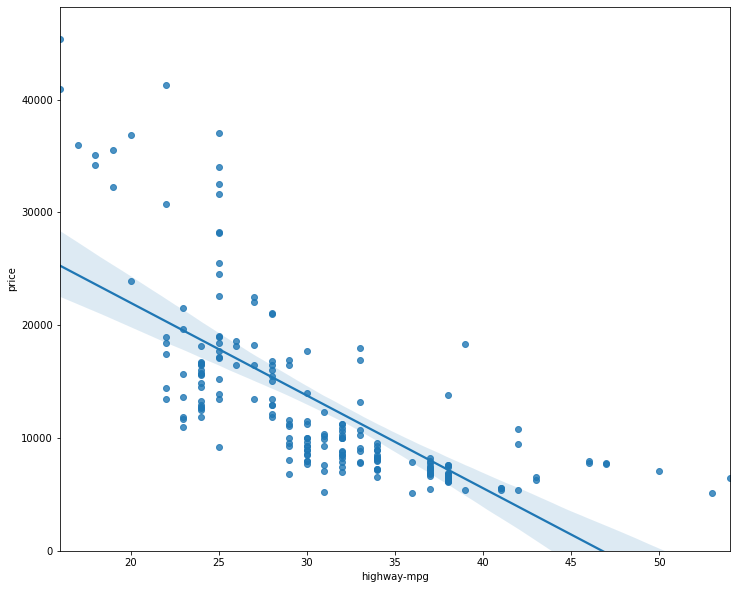

In [118]:
#Regression plot using "highway-mpg" & "price"
width = 12   #for customizing the "width" of the figure
height = 10  #for customizing the "height" of the figure
plt.figure(figsize=(width, height))      #using matplotlibs "figure" method to customize the figure size by setting the "figsize" parameter equal to desired "width" and "height"
sns.regplot(x= "highway-mpg", y ="price", data=df)    #using seaborns "regplot" method 
plt.ylim(0,)

(0.0, 47414.1)

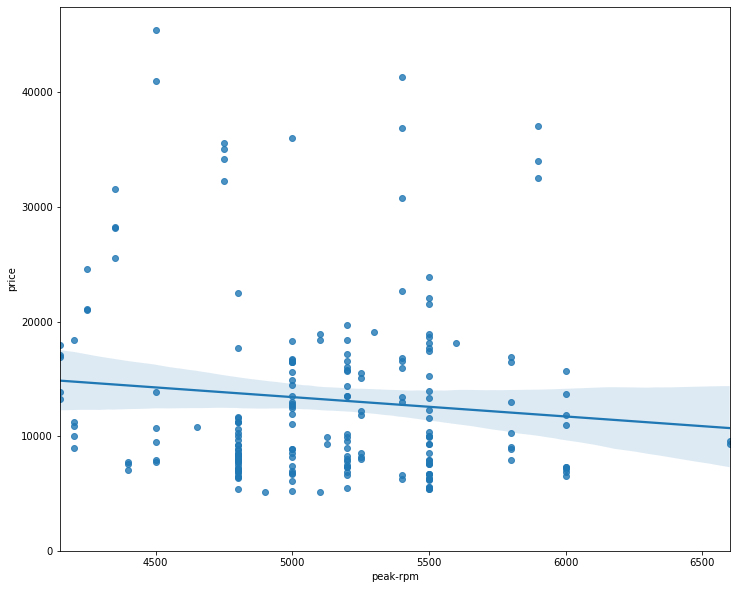

In [119]:
#regression plot using "peak-rpm" & "price"
plt.figure(figsize= (width, height))
sns.regplot(x= "peak-rpm", y= "price", data=df)
plt.ylim(0,)

In [120]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [121]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


__Comparing__ the regression plot of __"peak-rpm"__ and __"highway-mpg"__ we see that the __points__ for "__highway-mpg__" are much __closer to__ the __generated line__ and __on__ the __average decrease__. The __points__ for "__peak-rpm__" have __more spread__ around the __predicted line__, and it is much __harder to determine__ __if__ the __points__ are __decreasing__ or __increasing__ __as__ the "__peak-rpm__" __increases__. 


For verification after determing the __correlation__ of __"highway-mpg" & "peak-rpm" with "price"__ it can be __concluded__ that __"highway-mpg"__ is __more strongly correlated with "price"__ as __compared__ to __"peak-rpm"__ where there is __weak correlation__ between the dependent variable & independent variable.

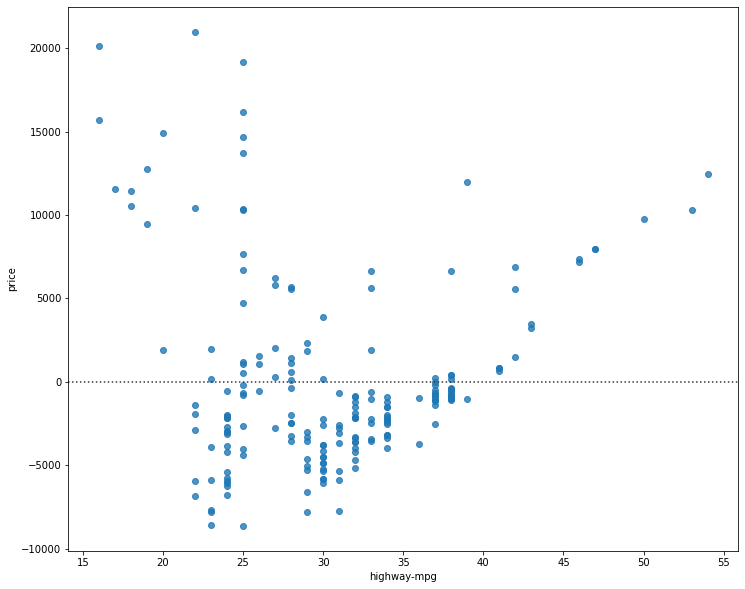

In [122]:
#Residual plot for "highway-mpg" & "price"
width= 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x= "highway-mpg", y= "price", data=df)         #using seaborns "residplot" to plot residual plot
plt.show()

We can see from this residual plot that the __residuals__ are __not randomly spread around the x-axis__, which leads to believe that __maybe__ a __non-linear model__ is __more appropriate for this data__

In [123]:
import warnings
warnings.filterwarnings(action="ignore", category = FutureWarning)

Used the above code to supress the future warning before calling __any depreciated__ function,  basically a future warning stating that tells you is that seaborn uses a scipy function that will change behaviour in the future due to a change made in a recent numpy version

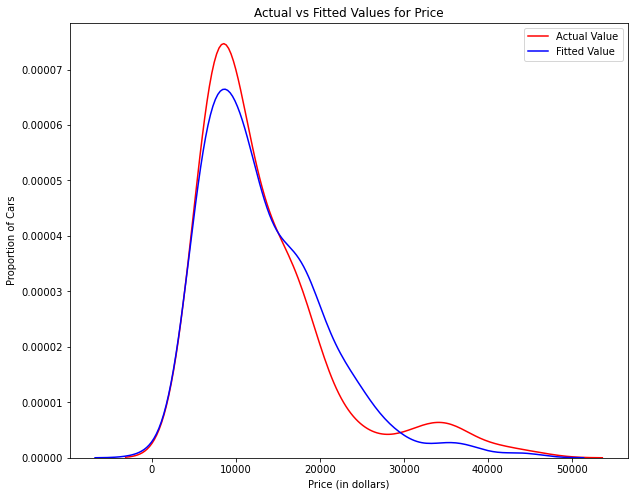

In [124]:
#Kernel Density plot for "highway-mpg", "engine-size", "curb-weight" & "horsepower"
Y_hat = lm3.predict(Z)

width = 10
height = 8
plt.figure(figsize=(width, height))  #To control figure size

sns.kdeplot(df['price'],color="r", label = "Actual Value")   #using "kdeplot" to plot kernel density plot 
sns.kdeplot(Y_hat, color="b", label = "Fitted Value")
plt.legend()

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.ticklabel_format(style = "plain")   #To turn off scientific notation
plt.show()
plt.close()

We can see that the __fitted values__ are __reasonably close to the actual values__, __since__ the __two distributions overlap a bit__. However, there is definitely some room for improvement

### Polynomial Regression & Pipelines 

__Polynomial Regression__ gives __non-linear relationships__ by __squaring__ or __setting higher-order terms__ of the __predictor variables__


__Different orders__ of polynomial regression :


__Quadratic__ - __2nd order__

__Yhat = a + b1X + b2X2__


__Cubic__ - __3rd order__

__Yhat = a + b1X + b2X2 + b3X3__


__Higher order :__

__Y = a + b1X + b2X2 + b3X3....__


In [125]:
x = df["highway-mpg"]
y = df["price"]

#creating polynomial of 3rd Order
f = np.polyfit(x,y,3)  #using "polyfit" to fit the polynomial
p = np.poly1d(f)       #using "poly1d" to display polynomial function
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [126]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

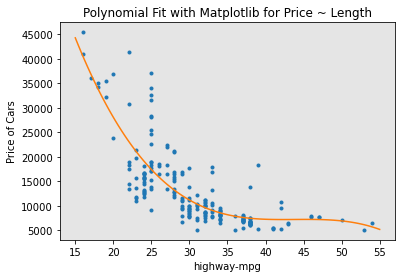

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [127]:
PlotPolly(p, x, y, "highway-mpg")
np.polyfit(x, y, 3)

From the above we can see that plotting that this __polynomial model performs better than the linear model__. This is __because__ the __generated polynomial function "hits" more of the data points__

In [128]:
#Creating 11th order polynomial model with the above variables (x & y)
g = np.polyfit(x, y, 11)
h= np.poly1d(g)
print(h)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


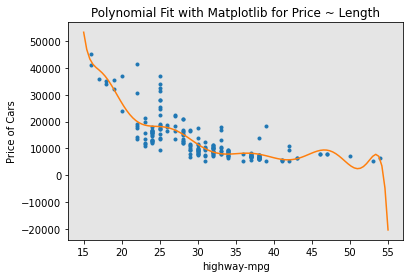

array([-1.24263329e-08,  4.72184656e-06, -8.02843076e-04,  8.05639892e-02,
       -5.29740707e+00,  2.39470203e+02, -7.58845334e+03,  1.68447162e+05,
       -2.56531009e+06,  2.55140476e+07, -1.49106876e+08,  3.87929851e+08])

In [129]:
PlotPolly(h, x, y, "highway-mpg")
np.polyfit(x, y, 11)

__Multivariate Polynomial function :__

The analytical expression for Multivariate Polynomial function gets __complicated__. For example, the expression for a __second-order (degree=2)polynomial__ with __two variables__ is given by :

__Yhat = a + b1X1 + b2X2 + b3X1X2 + b4X21 + b5X22__

In [130]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2)             #creating polynomial features object of degree 2
pr

PolynomialFeatures()

In [131]:
Z_pr = pr.fit_transform(Z)           #"fit_transform" will return the transformed version of Z, where is having "curb-weight", "engine-size", "highway-mpg" and "horsepower" 

In [132]:
Z.shape

(201, 4)

the __original data__ is of __201 samples__ and __4 features__

In [133]:
Z_pr.shape

(201, 15)

__after transformtion__, there are __201 samples__ and __15 features__

### Pipeline 

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [135]:
#To create a Pipeline, create a list of tuples including the name of the model or estimator and its corresponding constructor

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]   

pipe = Pipeline(Input)       #inputing the list as an argument to the pipeline constructor 
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [136]:
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [137]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [138]:
#creating a pipeline for "Z" and "price" where data will be standardized and linear model will be made
new_input= [("scale", StandardScaler()), ("model", LinearRegression())]

new_pipe = Pipeline(new_input)
new_pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [139]:
new_pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [140]:
y_pipe = new_pipe.predict(Z)
y_pipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

### Measures for In-Sample Evaluation 

In this __quantitative measures__ will determine __how accurate the model is__

__Two methods__ that will be used to determine accuracy of the data : __R^2 (R-squared)__ and __Mean Squared Error (MSE)__

#### Model 1 : Simple Linear Regression

In [141]:
#Calculating R^2


lm.fit(X,Y)   #Using scikit learn's "LinearRegression()'s" "fit()" method to fit the linear model

#finding the R^2
#Using linear regressions's "score()" method that Return the coefficient of determination R^2 of the prediction
print("The R-squared is :", lm.score(X,Y))   

The R-squared is : 0.4965911884339176


It can be said that __49.659% of the variation__ __of the price__ is __explained by__ this __simple linear model "highway-mpg"__

In [142]:
#to predict the output i.e., "yhat" using the predict method, where X is the input variable
Yhat= lm.predict(X)
print("The output of the first four predicted value is :", Yhat[0:4])

The output of the first four predicted value is : [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


#### Calculating MSE 

In [143]:
from sklearn.metrics import mean_squared_error

#Calculating MSE for simple linear regression


mse= mean_squared_error(df["price"], Yhat)    #using sklearn.metrics's "mean_squared_error(y_true, y_pred)" where "y_true" stands for ground truth(correct/actual) target value & "y_pred" is for estimated target value(s)

print("The mean squared error of Price and predicted value(predicted price) is :", mse)

The mean squared error of Price and predicted value(predicted price) is : 31635042.944639888


#### Model 2 : Multiple Linear Regression 

In [144]:
#Calculating R^2

#Fitting the model with "Z" as mutliple independent variable(s) 
lm3.fit(Z, df["price"])

#finding R^2
print("The R-squared is :", lm3.score(Z, df["price"]))

The R-squared is : 0.8093732522175299


It can be said that __80.896 %__ of the variation of price is explained by this multiple linear regression "multi_fit".

In [145]:
#calculating the predicted "price" for "Z"
Y_predict_multifit = lm3.predict(Z)
print("the output of the first 5 predicted price is :", Y_predict_multifit[0:5])

the output of the first 5 predicted price is : [13699.07700462 13699.07700462 19052.71346719 10620.61524404
 15520.90025344]


In [146]:
#Calculating the MSE for multiple linear regression

print("The mean squared error of price and predicted value of price for multiple independent variables(Z) :", \
     mean_squared_error(df["price"], Y_predict_multifit))

The mean squared error of price and predicted value of price for multiple independent variables(Z) : 11979300.34981888


#### Model 3 : Polynomial fit

It requires __sklearn.metrics.r2_score__ ; the different function to perform __R squared__ method

In [147]:
from sklearn.metrics import r2_score

#Calculating R^2 for the polynomial model that used "highway-mpg" as " x"(independent variable) and "price" as "y"

r_squared = r2_score(y, p(x))                             #using sklearn.metrics's "r2_score(y_true, y_pred)"
print("The R- sqaured value is : ", r_squared)

The R- sqaured value is :  0.6741946663906517


It can be said that __67.419 %__ of the variation of price is explained by this __polynomial fit__

In [148]:
#Calculating MSE for the polynomial fit

m_s_e = mean_squared_error(df["price"], p(x))
print("The mean squared error of price and predicted value of price using polynomial fit :", m_s_e )

The mean squared error of price and predicted value of price using polynomial fit : 20474146.426361226


### Prediction

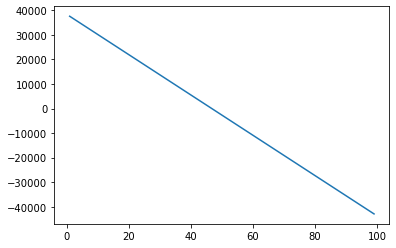

In [149]:
new_input = np.arange(1, 100, 1).reshape(-1,1)
lm.fit(X, Y)
yhat = lm.predict(new_input)
plt.plot(new_input, yhat)
plt.show()

### Decision Making : Determining a Good model fit 

<font color=green>__R-squared :__ The model with the __higher R-squared__ value is a __better fit__ for the data</font>

<font color =red>__MSE :__ The model with the __smallest MSE value__ is a __better fit__ for the data</font>


__Simple Linear Regression (SLR) :__ The __R-squared__ is : __0.4965911884339176__ and the __MSE__ is __31635042.944639888__


__Multiple Linear Regression (MLR) :__ The __R-squared__ is : __0.8093732522175299__ and the __MSE__ is __11979300.34981888__


__Polynomial Fit :__ The __R-sqaured value__ is :  __0.6741946663906517__ and the __MSE__ is __20474146.426361226__


__SLR vs MLR :__ __"MLR"__ is a __better fit__ as compared to SLR since the value of R^2 of MLR is higher than SLR & the value of MSE of MLR is smaller than SLR

__SLR vs Polynomial Fit :__ __"Polynomial fit"__ is a better fit as compared to SLR because the value of R^2 of polynomial fit is higher than SLR & the value of MSE of polynomial fit is smaller than SLR

__MLR vs Polynomial Fit :__ __"MLR"__ is a __better fit__ as compared to polynomial fit since the value of R^2 of MLR is higher than the value of R^2 of polynomial fit & the value of MSE of MLR is smaller than the value of MSE of Polynomial fit

__Conclusion :__ Comparing all three models, it can be said that __Multiple linear regression__ is the __best model__ to __predict price__ from the dataset. 

## Model Evaluation and Refinement 

In [150]:
import pandas as pd
import numpy as np

In [151]:
#Importing the clean data

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv"
df1 = pd.read_csv(path)

In [152]:
#First just using the numeric data

df1 =df1._get_numeric_data()
df1.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


__Libraries for plotting__

In [153]:
%%capture
! pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

__Functions for plotting__

In [154]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    sns.kdeplot(RedFunction, color="r", label=RedName)
    sns.kdeplot(BlueFunction, color="b", label=BlueName)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()

    plt.show()
    plt.close()

In [155]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and Testing 

In [156]:
y_data = df1["price"]                          #placing target variable in a separate variable
x_data = df1.drop("price", axis = 1)           #for dropping price in x data

In [157]:
#Randomly splitting data into training & testing data using the function train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)   #The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [158]:
#Using the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing,
#the parameter "random_state" equal to zero,
#The output of the function will be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1"

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size = 0.40, random_state=0 )
print("number of test samples :", x_test_1.shape[0])
print("number of training samples :", x_train_1.shape[0])

number of test samples : 81
number of training samples : 120


In [159]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()     

In [160]:
#Fitting the model using the feature "horsepower"

lre.fit(x_train[["horsepower"]], y_train)

LinearRegression()

In [161]:
#Calculating R^2 on the "test" data

lre.score(x_test[["horsepower"]], y_test)

0.3635875575078824

In [162]:
#Calculating R^2 on the "train" data

lre.score(x_train[["horsepower"]], y_train)

0.6619724197515103

__R^2__ on the __"test"__ data is __much smaller__ than R^2 on the __"train"__ data

In [163]:
#Finding R^2 on the test data using 40% of the data for training data

lre.score(x_train_1[["horsepower"]], y_train_1)

0.5589207284321129

In [164]:
#Finding R^2 on the test data using 40% of the data for testing data

lre.score(x_test_1[["horsepower"]], y_test_1)

0.7565592251392638

#### Cross- Validation Score 

When we __do not have sufficient testing data ;__ we may want to __perform Cross-validation__

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv= 4)     #input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv' determines the number of folds; in this case 4
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [167]:
#Calculating the "average" and "standard deviation" on the estimate

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [168]:
#Using negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'

-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [169]:
from sklearn.model_selection import cross_val_predict

__cross_val_predict__ function predicts the output. The function __splits up the data into__ the __specified number of folds__, using __one fold for testing__ and the __other folds__ are used __for training__

In [170]:
Yhat = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv= 4)
Yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Overfitting, Underfitting and Model Selection 

In [171]:
#Creating "multiple linear regression" objects and training the model using "curb-weight", "engine-size", "horsepower" & "highway-mpg"

lr = LinearRegression()
lr.fit(x_train[["curb-weight","engine-size", "horsepower", "highway-mpg"]], y_train)

LinearRegression()

In [172]:
#Prediction using training data

yhat_train = lr.predict(x_train[["curb-weight", "engine-size","horsepower", "highway-mpg"]]) 
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [173]:
#Prediction using the test data

yhat_test = lr.predict(x_test[["curb-weight", "engine-size", "horsepower", "highway-mpg"]])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

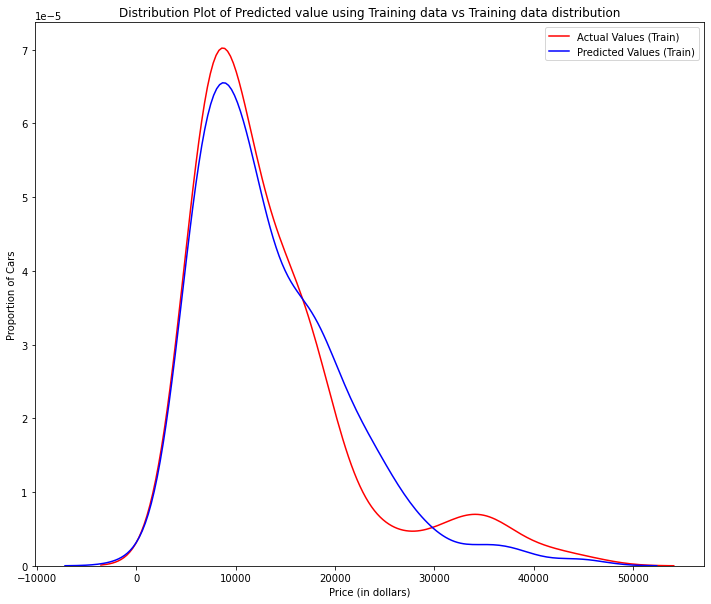

In [175]:
#Model evaluation using "training data" & its distribution of predicted values of the training data

Title = "Distribution Plot of Predicted value using Training data vs Training data distribution"
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
 #"red line" shows "Actual values(train)"" & "blue line" shows "Predicted values(train)"

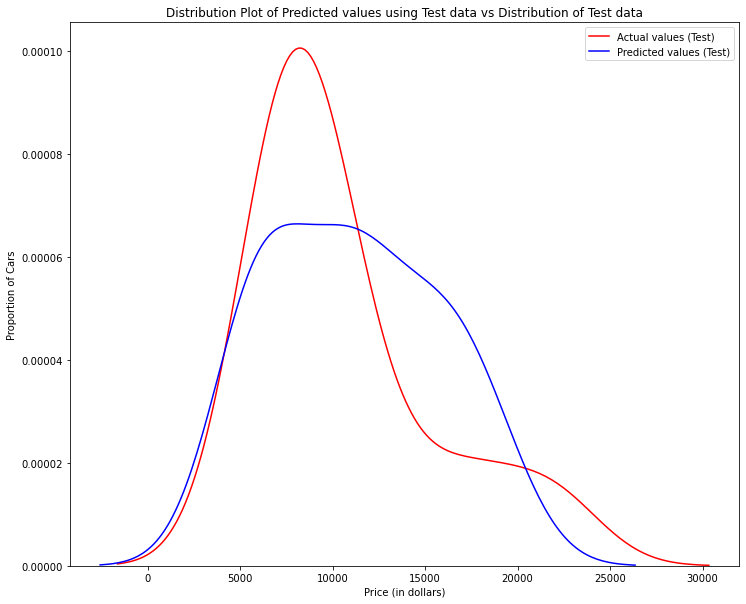

In [176]:
Title = "Distribution Plot of Predicted values using Test data vs Distribution of Test data"
DistributionPlot(y_test, yhat_test, "Actual values (Test)", "Predicted values (Test)", Title)

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
#Using 55% of the data for the training and rest for the testing

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.55, random_state= 0)

In [179]:
#Performing degree 5 polynomial transformation on the feature "horsepower"

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5)

In [180]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [181]:
#Using method "predict" to see the "output" of the model, then assigning values to yhat

yhat = poly.predict(x_train_pr)
yhat[0:5]

array([ 6109.06492071,  6109.06492071, 14143.15427884, 14316.03732095,
       13967.83500675])

In [182]:
#Taking first five "predicted values" & comparing them to actual targets

print("Predicted values :", yhat[0:4])
print("True values :", y_test[0:4].values)

Predicted values : [ 6109.06492071  6109.06492071 14143.15427884 14316.03732095]
True values : [ 6295. 10698. 13860. 13499.]


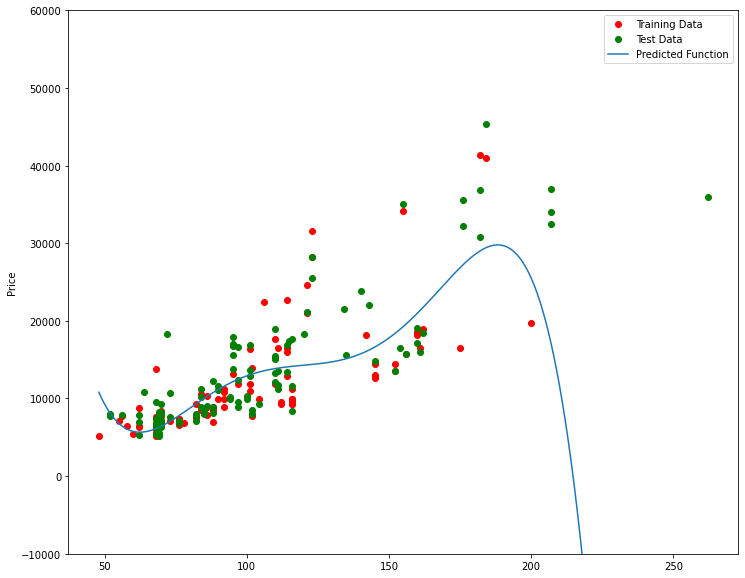

In [183]:
PollyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)

In [184]:
#Calculating R^2 of the training data

poly.score(x_train_pr, y_train)

0.5682646619045983

In [185]:
#Calculating R^2 of the test data

poly.score(x_test_pr, y_test)

-38.234919306296256

From the above two values of R^2 it can be seen that, R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The __lower the R^2, the worse the model__, a __Negative R^2 is a sign of overfitting__

Text(3, 0.75, 'Maximum R^2 ')

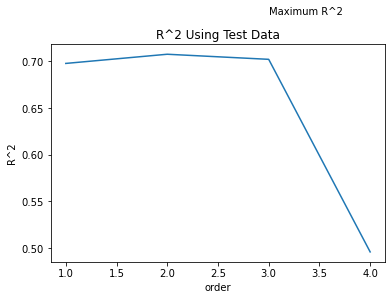

In [186]:
#To see how R^2 changes on test data for different order polynomials and plotting the results 

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

It can be seen that the __R^2 gradually increases until an order three polynomial is used__. Then the __R^2 dramatically decreases at four__

In [187]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [188]:
#The following interface allows to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [189]:
#performing polynomial transformations with more than one feature so Creating "PolynomialFeatures" object "pr1" with degree 2

pr1 = PolynomialFeatures(degree=2)

In [190]:
#Transforming the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'

x_train_pr1 = pr1.fit_transform(x_train[["curb-weight", "engine-size", "horsepower", "highway-mpg"]])

x_test_pr1 = pr1.fit_transform(x_test[["curb-weight", "engine-size", "horsepower", "highway-mpg"]])

In [191]:
#To check the no. of dimensions of new feature

x_train_pr1.shape

(90, 15)

It means there are now 15 features

In [192]:
#Creating a linear regression model "poly1" and training the object using polynomial features

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

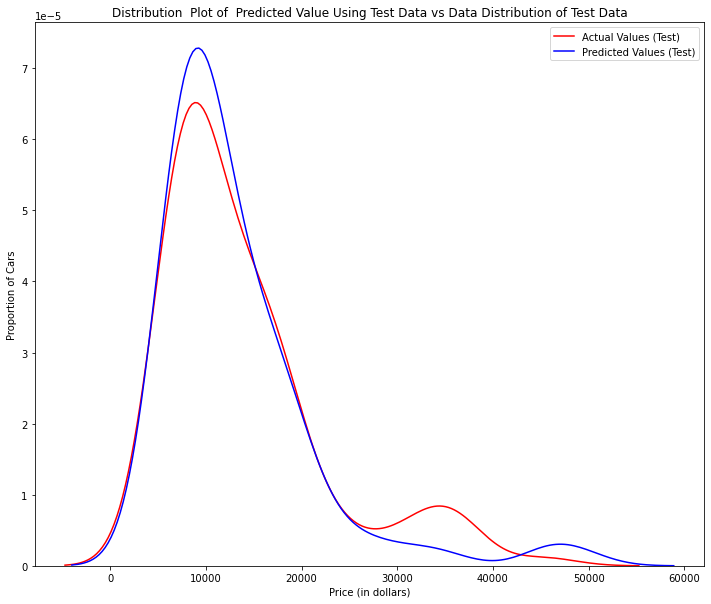

In [193]:
#Using the method "predict" to predict an output on the polynomial features, 
#then using the function "DistributionPlot" to display the distribution of the predicted output vs the test data

yhat_test1 = poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In the above figure, it can be seen that the __predicted value is higher than actual value for cars where the price $ 10,000 range__ 


On the other hand __Predicted price is lower than the actual price in the range 30,000 to 40,000__ . 

As such the __model is not as accurate in these ranges__

### Ridge Regression 

In [194]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[["curb-weight", "engine-size", "horsepower", "highway-mpg", "normalized-losses", "symboling"]])
x_test_pr=pr.fit_transform(x_test[["curb-weight", "engine-size", "horsepower", "highway-mpg","normalized-losses","symboling"]])

In [195]:
#Importing "ridge" from the module linear models

from sklearn.linear_model import Ridge

In [196]:
#creating a Ridge regression object, setting the regularization parameter to 0.1

RidgeModel = Ridge(alpha=0.1)

In [197]:
#Fitting the model using method "fit" like regular regression

RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [198]:
#Obtaining a prediction

yhat = RidgeModel.predict(x_test_pr)

In [199]:
#Comparing first five predicted samples to test set

print("Predicted :", yhat[0:4])
print("Test set :", y_test[0:4].values)

Predicted : [ 6378.17644532  9829.68801644 18363.90082546 19876.684319  ]
Test set : [ 6295. 10698. 13860. 13499.]


In [200]:
#Using "for loop" to find the value of alpha that will minimize the test error

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

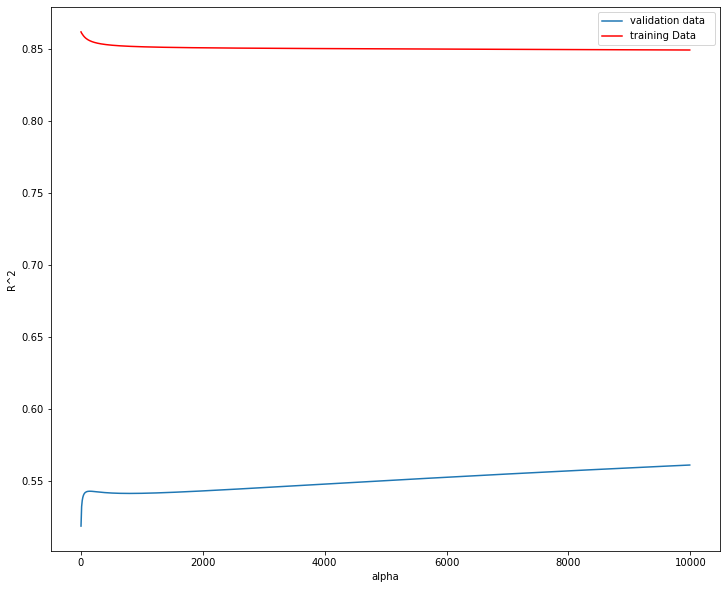

In [201]:
#To plot the different values of R^2 for different alphas

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The __red line__ in figure represents the __R^2__ of the __training data__


__As Alpha increases the R^2 decreases__


Therefore as __Alpha increases the model performs worse on the training data__



The __blue line__ represents the __R^2 on the validation data__
__As the value for Alpha increases the R^2 increases__ and __converges at a point__

In [202]:
#Importing "GridSearchCV" from the module "model_selection"

from sklearn.model_selection import GridSearchCV

In [203]:
#Creating a dictionary of parameter values

parameters1 = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [204]:
#Creating Ridge regions object

RR = Ridge()
RR

Ridge()

In [205]:
#Creating ridge grid search object

Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [207]:
#Fitting the model

Grid1.fit(x_data[["horsepower", "curb-weight", "highway-mpg", "engine-size"]], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

__The object finds the best parameter values on the <font color='green'>validation data</font>. We can obtain the estimator with the best parameters and assign it to the variable BestRR__

In [208]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [209]:
#Testing our model on test data

BestRR.score(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_test)

-0.10829499383822472

In [210]:
#Performing Grid search for alpha parameter and normalization parameter and finding best values of the parameter

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)